# Test for Recommender System using SciKit-Surprise

### import libraries

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
import time
import datetime
%load_ext autoreload
%autoreload 2

In [2]:
# import scikit-surprise stuff
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate, GridSearchCV

In [3]:
# import pandas for DataFrame
import pandas as pd

In [4]:
# import costum stuff
from utility import *

### Import train and test set

In [5]:
datafilepath = "../data/data_train.csv"
data_df = loadData2df(datafilepath)

In [6]:
predinfilepath = "../data/sample_submission.csv"
pred_df = loadData2df(predinfilepath)

In [50]:
data_red_df = data_df[data_df["itemId"].isin(itemstats_red.index)]
data_red_df = data_red_df[data_red_df["userId"].isin(userstats_red.index)]

In [51]:
itemstats2 = data_red_df["itemId"].value_counts()
userstats2 = data_red_df["userId"].value_counts()

In [52]:
itemstats2.min()

53

In [53]:
userstats2.min()

20

### Compute and plot interesting stuff

In [201]:
figuresize=(5, 4)

#### Rating Distribution

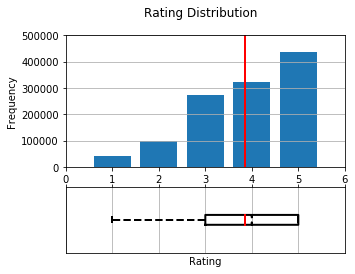

In [210]:
fig = plt.figure(figsize=figuresize)
fig.suptitle("Rating Distribution")
axlst = fig.subplots(2,1,sharex=False,gridspec_kw={"height_ratios":[2,1]})
myhist = axlst[0].hist(data_df["rating"],bins=[0.5+i for i in range(6)],align="mid",rwidth=0.8)
meanrating = data_df["rating"].mean()
meanplt = axlst[0].plot([meanrating,meanrating],[0,500000],lw=2,color="r")
axlst[0].axes.set_ylim([0,500000])
axlst[0].axes.set_xlim([0,6])
axlst[0].grid(axis="y")
axlst[0].axes.set_ylabel("Frequency")
mybxplt = axlst[1].boxplot(data_df["rating"],\
                           showmeans=True,vert=False,meanline=True,notch=True,\
                           meanprops={"color":"r","linestyle":"-","linewidth":2},\
                           medianprops={"color":"none"},\
                           boxprops={"linewidth":2},\
                           whiskerprops={"linestyle":"--","linewidth":2},\
                           capprops={"linewidth":2})
axlst[1].axes.set_xlim([0,6])
axlst[1].grid(axis="x")
axlst[1].tick_params(axis="y",which="both",left=False,right=False,labelleft=False)
axlst[1].tick_params(axis="x",which="both",bottom=False,top=True,labelbottom=False)
axlst[1].axes.set_xlabel("Rating")
fig.savefig("../report/hist_ratings.png")

#### Ratings per user & ratings per item

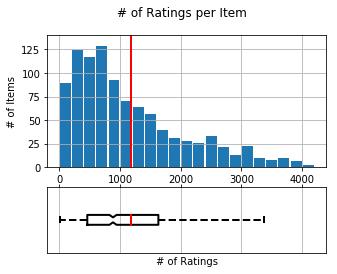

In [212]:
fig = plt.figure(figsize=figuresize)
fig.suptitle("# of Ratings per Item")
axlst = fig.subplots(2,1,sharex=False,gridspec_kw={"height_ratios":[2,1]})
myhist = axlst[0].hist(itemstat,bins=[i for i in range(0,4201,200)],align="mid",rwidth=0.9)
meanv = itemstat.mean()
meanplt = axlst[0].plot([meanv,meanv],[0,140],lw=2,color="r")
axlst[0].axes.set_ylim([0,140])
#axlst[0].axes.set_xlim([0,6])
axlst[0].grid(which="both")
axlst[0].axes.set_ylabel("# of Items")
#axlst[0].axes.minorticks_on()
mybxplt = axlst[1].boxplot(itemstat,\
                           showmeans=True,vert=False,meanline=True,notch=True,showfliers=False,\
                           meanprops={"color":"r","linestyle":"-","linewidth":2},\
                           medianprops={"color":"none"},\
                           boxprops={"linewidth":2},\
                           whiskerprops={"linestyle":"--","linewidth":2},\
                           capprops={"linewidth":2})
axlst[1].axes.set_xlim(axlst[0].axes.get_xlim())
axlst[1].grid(axis="x")
axlst[1].tick_params(axis="y",which="both",left=False,right=False,labelleft=False)
axlst[1].tick_params(axis="x",which="both",bottom=False,top=True,labelbottom=False)
axlst[1].axes.set_xlabel("# of Ratings")
fig.savefig("../report/hist_items.png")

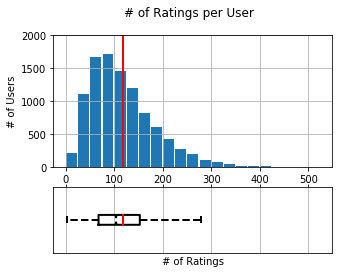

In [213]:
fig = plt.figure(figsize=figuresize)
fig.suptitle("# of Ratings per User")
axlst = fig.subplots(2,1,sharex=False,gridspec_kw={"height_ratios":[2,1]})
myhist = axlst[0].hist(userstats,bins=[i for i in range(0,526,25)],align="mid",rwidth=0.9)
meanv = userstats.mean()
meanplt = axlst[0].plot([meanv,meanv],[0,2000],lw=2,color="r")
axlst[0].axes.set_ylim([0,2000])
#axlst[0].axes.set_xlim([0,6])
axlst[0].grid(which="both")
axlst[0].axes.set_ylabel("# of Users")
#axlst[0].axes.minorticks_on()
mybxplt = axlst[1].boxplot(userstats,\
                           showmeans=True,vert=False,meanline=True,notch=True,showfliers=False,\
                           meanprops={"color":"r","linestyle":"-","linewidth":2},\
                           medianprops={"color":"none"},\
                           boxprops={"linewidth":2},\
                           whiskerprops={"linestyle":"--","linewidth":2},\
                           capprops={"linewidth":2})
axlst[1].axes.set_xlim(axlst[0].axes.get_xlim())
axlst[1].grid(axis="x")
axlst[1].tick_params(axis="y",which="both",left=False,right=False,labelleft=False)
axlst[1].tick_params(axis="x",which="both",bottom=False,top=True,labelbottom=False)
axlst[1].axes.set_xlabel("# of Ratings")
fig.savefig("../report/hist_users.png")